<a href="https://colab.research.google.com/github/rodrigorissettoterra/Analise-de-series-temporais/blob/main/An%C3%A1lise_de_vendas_de_uma_empresa_de_telefonia_celular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de vendas de uma empresa de telefonia celular

##Preparando o ambiente

###Importando as bibliotecas necessárias

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

###Importando a base de dados

In [28]:
celular = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/alucel.csv')
celular

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


###Modificações

Tipos de dados presentes na base de dados

In [29]:
celular.dtypes

dia        object
vendas    float64
dtype: object

Convertendo a data

In [30]:
celular['dia'] = pd.to_datetime(celular['dia'])
celular.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

###Informações sobre a base de dados utilizada

In [31]:
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',celular.shape[0])
print('O número de colunas é:',celular.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',celular.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 61
O número de colunas é: 2

A quantidade de dados nulos na base de dados é de: 0


##Modificações na base de dados

###Ampliando a base de dados

Incluindo uma coluna para a varação nas vendas diárias

In [32]:
celular['variacao_diaria'] = celular['vendas'].diff()
celular

,dia,vendas,variacao_diaria
0,2018-10-01,1374.83,NaN
1,2018-10-02,2185.69,810.86
2,2018-10-03,1860.36,-325.33
3,2018-10-04,1939.02,78.66
4,2018-10-05,1946.17,7.15
...,...,...,...
56,2018-11-26,10773.53,-1726.46
57,2018-11-27,22984.56,12211.03
58,2018-11-28,9216.26,-13768.30
59,2018-11-29,12147.61,2931.35


Incluindo uma coluna para a taxa de variação da variação diária (aceleração)

In [33]:
celular['aceleracao'] = celular['variacao_diaria'].diff()
celular

,dia,vendas,variacao_diaria,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84
57,2018-11-27,22984.56,12211.03,13937.49
58,2018-11-28,9216.26,-13768.30,-25979.33
59,2018-11-29,12147.61,2931.35,16699.65


###Plotando um gráficos de Vendas diárias, Variação de vendas diárias e aceleração.

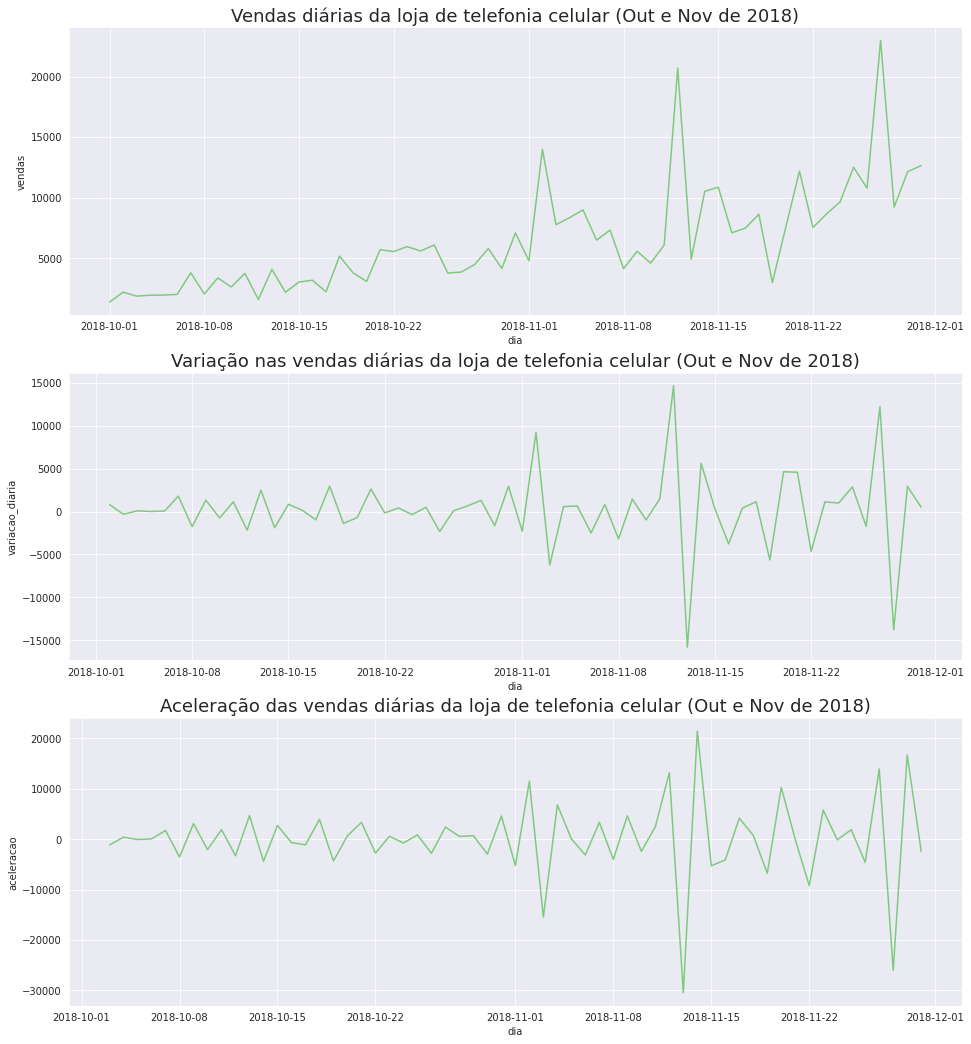

In [36]:
plt.figure(figsize=(16,18))
ax = plt.subplot(3,1,1)
ax.set_title('Vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x = 'dia', y = 'vendas', data=celular)
ax = plt.subplot(3,1,2)
ax.set_title('Variação nas vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x='dia', y='variacao_diaria', data=celular)
ax = plt.subplot(3,1,3)
ax.set_title('Aceleração das vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x='dia', y='aceleracao', data=celular)
ax=ax

##Média Móvel

Calculando a média móvel de 7 dias e incluindo os resultados em uma coluna extra

In [37]:
celular['media_movel_7dias'] = celular['vendas'].rolling(7).mean()
celular

,dia,vendas,variacao_diaria,aceleracao,media_movel_7dias
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571


Calculando a média móvel de 21 dias e incluindo os resultados em uma coluna extra

In [38]:
celular['media_movel_21dias'] = celular['vendas'].rolling(21).mean()
celular

,dia,vendas,variacao_diaria,aceleracao,media_movel_7dias,media_movel_21dias
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
...,...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714,8391.130000
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429,9176.810000
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714,9267.123333
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571,9649.053810


###Gráfico comparativo das vendas com a média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


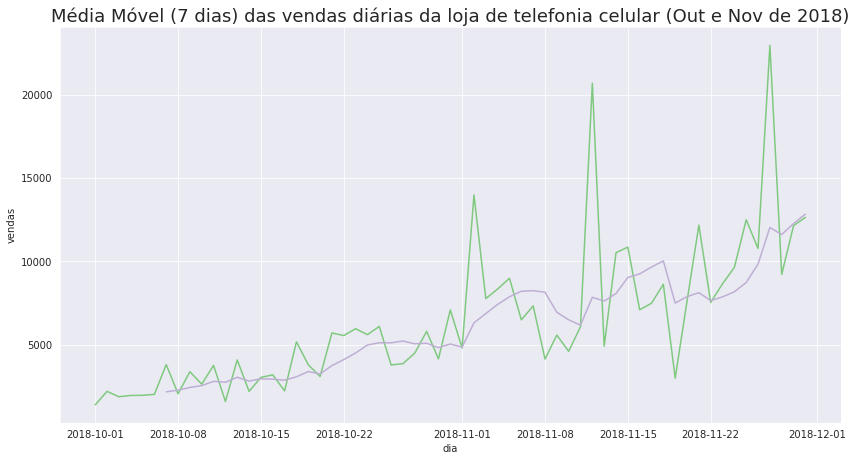

In [42]:
plt.figure(figsize=(14,16))
graf = plt.subplot(2,1,1)
graf.set_title('Vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x = 'dia', y = 'vendas', data=celular)
graf = plt.subplot(2,1,1)
graf.set_title('Média Móvel (7 dias) das vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x = 'dia', y = 'media_movel_7dias', data=celular)
graf = graf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


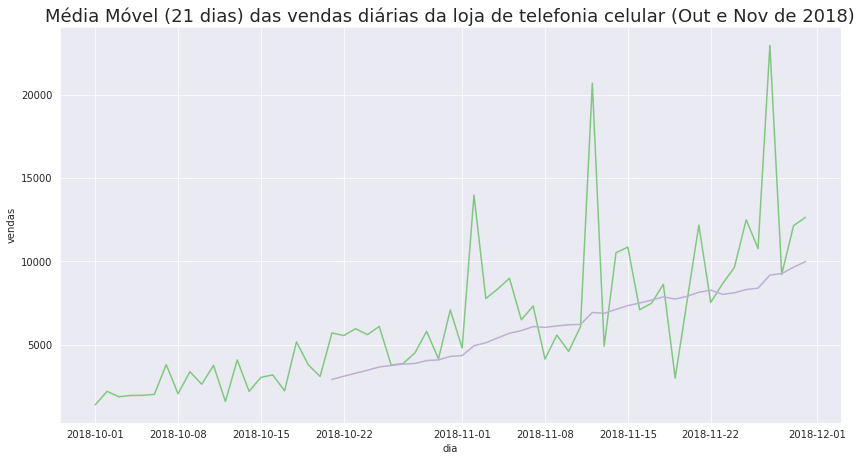

In [43]:
plt.figure(figsize=(14,16))
graf = plt.subplot(2,1,1)
graf.set_title('Vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x = 'dia', y = 'vendas', data=celular)
graf = plt.subplot(2,1,1)
graf.set_title('Média Móvel (21 dias) das vendas diárias da loja de telefonia celular (Out e Nov de 2018)', fontsize = 18)
sns.lineplot(x = 'dia', y = 'media_movel_21dias', data=celular)
graf = graf